In [1]:
from scipy.io import loadmat
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import pandas as pd
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler

In [2]:
path = r'./results/CellularTax_10-2000.mat'
gtpath = r'./data/CellularTax_GTlabel.mat'
info = loadmat(path)
train_p = info["Pred_train"]
train_gt = info["GT_train"]
train_ori = info["Ori_train"]
test_p = info["Pred_test"]
test_gt = info["GT_test"]
test_ori = info["Ori_test"]
GTlabel = loadmat(gtpath)["GTlabel"]
Pred = np.concatenate([train_p, test_p], axis=0)
GT = np.concatenate([train_gt, test_gt], axis=0)
Ori = np.concatenate([train_ori, test_ori], axis=0)
Pred = Pred.reshape(Pred.shape[0], -1)
GT = GT.reshape(GT.shape[0], -1)
Ori = Ori.reshape(Ori.shape[0], -1)

In [3]:
PEARSON_COE = []
PEARSON_COE_IN = []

for t in range(Pred.shape[1]):
    ipt = Ori[:, t]
    gt = GT[:, t]
    f = Pred[:, t]
    pear_co_f, p_f = pearsonr(f, gt)
    pear_co_in, p_in = pearsonr(ipt, gt)
    PEARSON_COE.append(pear_co_f)
    PEARSON_COE_IN.append(pear_co_in)
    
PEARSON_COE = np.array(PEARSON_COE)
PEARSON_COE_IN = np.array(PEARSON_COE_IN)

print('Before Imputation ==> Pearson: {:.4f} ± {:.4f}'.format(PEARSON_COE_IN.mean(), PEARSON_COE_IN.std()))
print('After Imputation ==> Pearson: {:.4f} ± {:.4f}'.format(PEARSON_COE.mean(), PEARSON_COE.std()))


Before Imputation ==> Pearson: 0.7412 ± 0.0956
After Imputation ==> Pearson: 0.8218 ± 0.0973


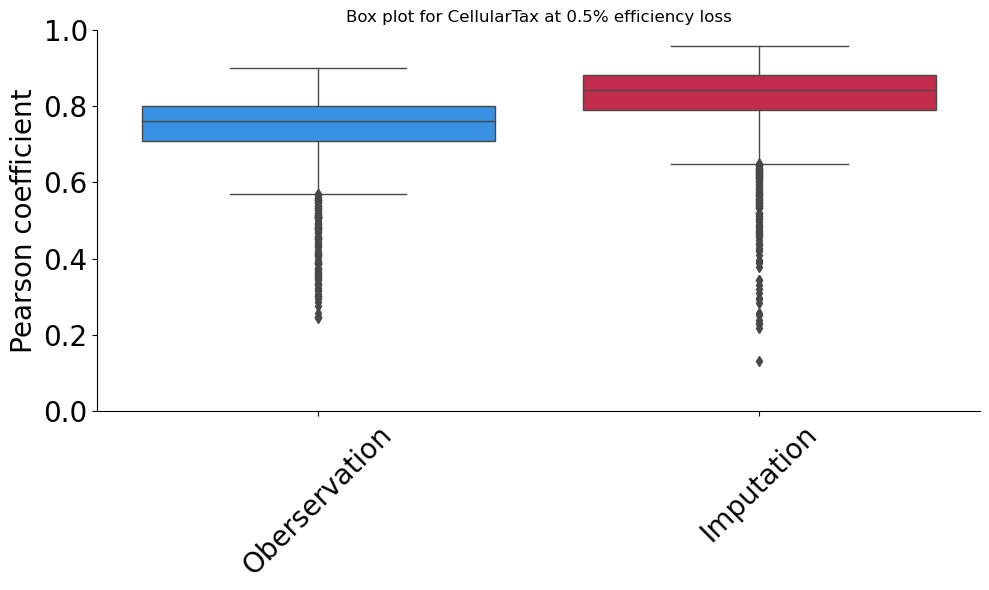

In [4]:
PEARSON_ALL = np.concatenate([PEARSON_COE_IN[:, None], PEARSON_COE[:, None]], axis=1)
palette = ['dodgerblue', 'crimson']
f, ax = plt.subplots(figsize=(10, 6))
df = pd.DataFrame(PEARSON_ALL)
sns.boxplot(data=df, palette=palette, dodge=False, linewidth=1)


ax.set(ylim=(0., 1.))

sns.despine(right=True, top=True)
plt.ylabel('Pearson coefficient', fontsize=20)
plt.xticks(range(0, 2, 1), ["Oberservation", "Imputation"], rotation=45, fontsize=20)
plt.yticks(fontsize=20)
plt.title("Box plot for CellularTax at 0.5% efficiency loss")
plt.tight_layout()


Text(0.5, 1.0, 'UMAP projection of the Reference data')

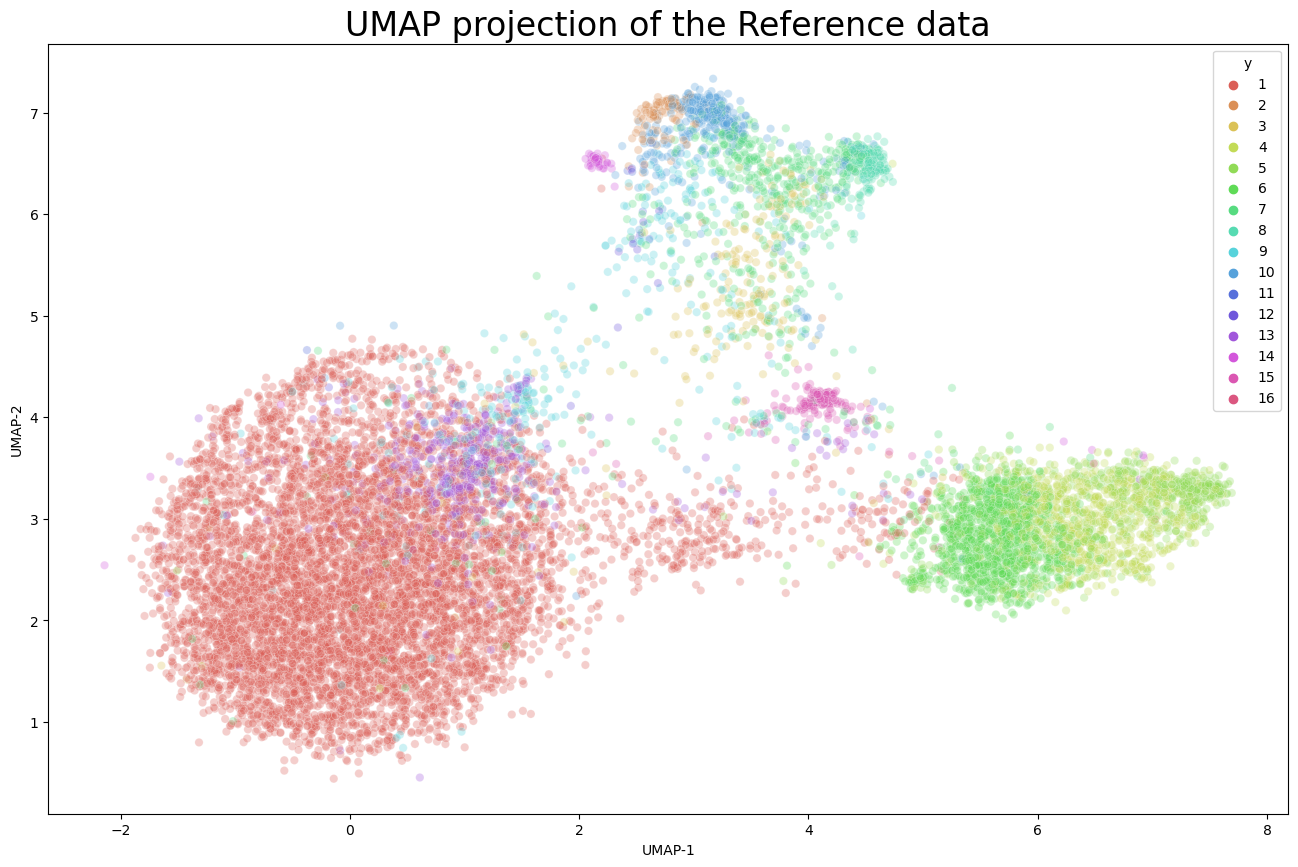

In [5]:
reducer = umap.UMAP()
scaled_GT_data = StandardScaler().fit_transform(GT)
UMAP_embedding_gt = reducer.fit_transform(scaled_GT_data)
df_subset = pd.DataFrame(GT)
df_subset['y'] = GTlabel
df_subset['UMAP-1'] = UMAP_embedding_gt[:, 0]
df_subset['UMAP-2'] = UMAP_embedding_gt[:, 1]
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="UMAP-1", y="UMAP-2",
    hue="y",
    palette=sns.color_palette("hls", 16),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('UMAP projection of the Reference data', fontsize=24)

Text(0.5, 1.0, 'UMAP projection of the Imputation results')

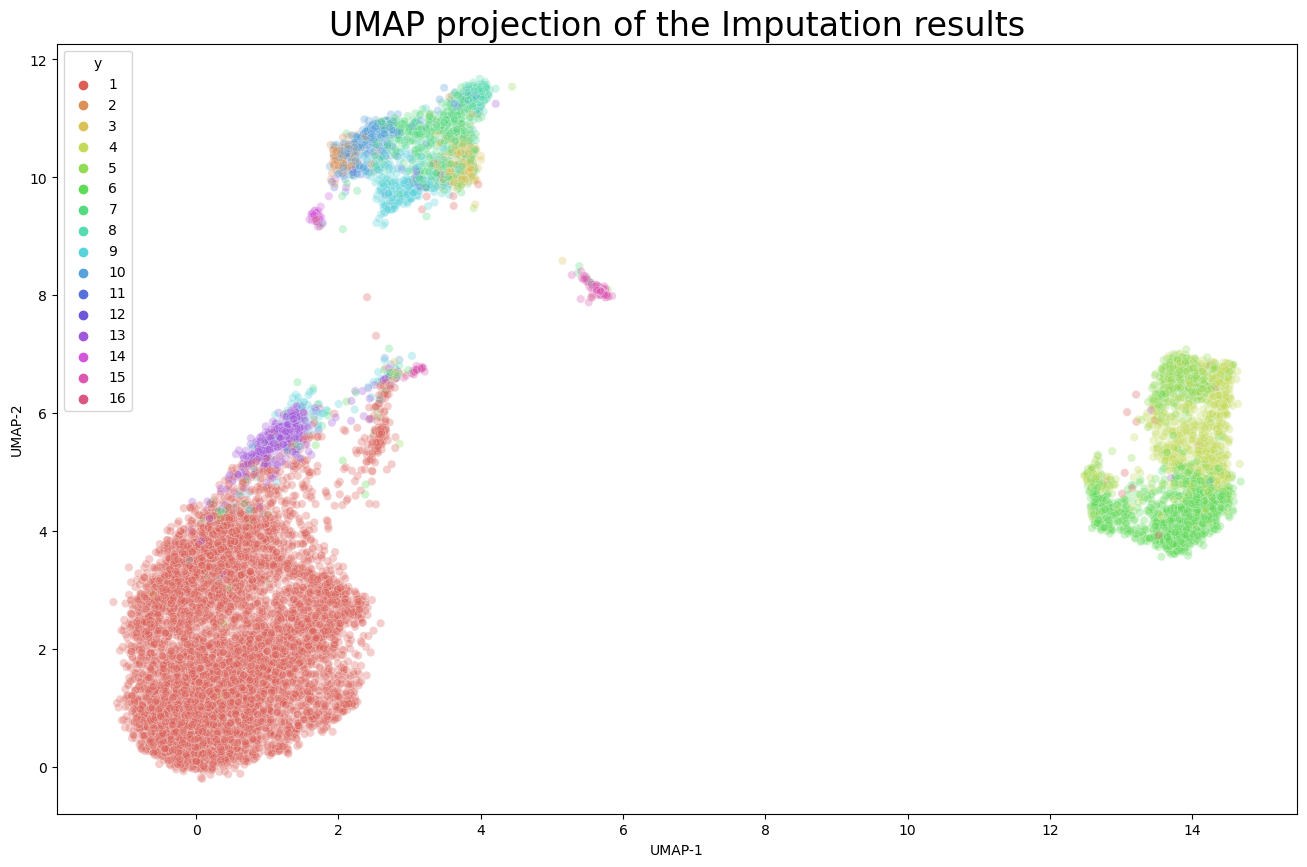

In [6]:
reducer = umap.UMAP()
scaled_Pred_data = StandardScaler().fit_transform(Pred)
UMAP_embedding_pred = reducer.fit_transform(scaled_Pred_data)
df_subset = pd.DataFrame(Pred)
df_subset['y'] = GTlabel
df_subset['UMAP-1'] = UMAP_embedding_pred[:, 0]
df_subset['UMAP-2'] = UMAP_embedding_pred[:, 1]
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="UMAP-1", y="UMAP-2",
    hue="y",
    palette=sns.color_palette("hls", 16),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('UMAP projection of the Imputation results', fontsize=24)

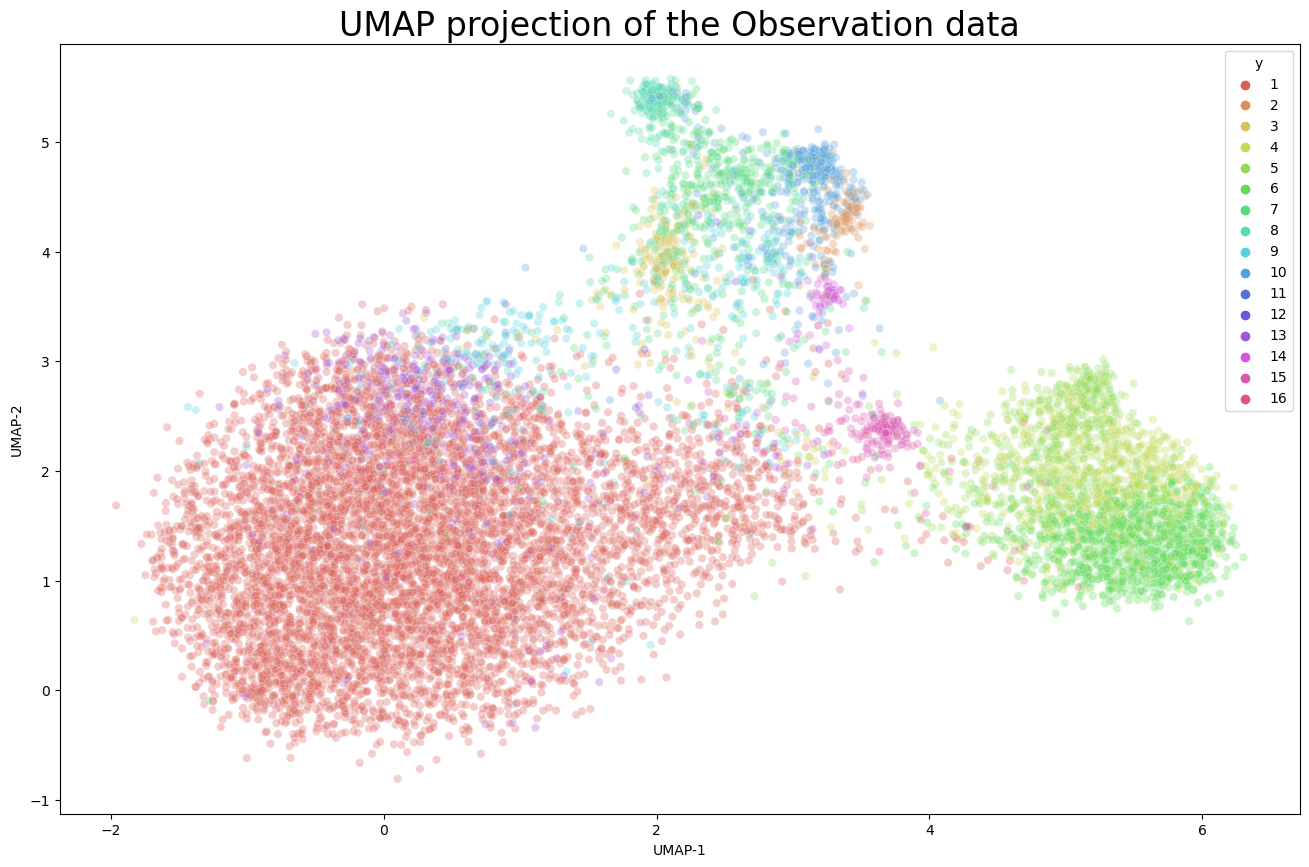

In [7]:
reducer = umap.UMAP()
scaled_Ori_data = StandardScaler().fit_transform(Ori)
UMAP_embedding_ori = reducer.fit_transform(scaled_Ori_data)
df_subset = pd.DataFrame(Ori)
df_subset['y'] = GTlabel
df_subset['UMAP-1'] = UMAP_embedding_ori[:, 0]
df_subset['UMAP-2'] = UMAP_embedding_ori[:, 1]
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x="UMAP-1", y="UMAP-2",
    hue="y",
    palette=sns.color_palette("hls", 16),
    data=df_subset,
    legend="full",
    alpha=0.3
)
plt.title('UMAP projection of the Observation data', fontsize=24);